In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kurtosis, skew
import re
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor 


offense=pd.read_csv('FFO_clean.csv')
defense=pd.read_csv('FFD_clean.csv')
offense.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True, axis=1)

In [3]:
offense.head()

,Team/Year,eFGPct,TOPct,ORPct,FTRate
0,2025 Abilene Christian,47.456214,20.614869,28.205128,39.616347
1,2025 Air Force,50.279107,20.779381,24.039653,37.240829
2,2025 Akron,55.272346,17.293210,32.758621,24.441341
3,2025 Alabama,56.504599,17.668644,37.049550,41.721419
4,2025 Alabama A&M,44.880677,21.762263,35.225956,37.875289


In [4]:
defense.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True, axis=1)

In [5]:
defense.head()

,Team/Year,eFGPct,TOPct,ORPct,FTRate
0,2025 Abilene Christian,53.568030,23.406179,30.112721,52.711703
1,2025 Air Force,54.512106,15.831910,28.934010,34.776229
2,2025 Akron,49.000740,17.665107,28.846154,34.196891
3,2025 Alabama,46.088539,13.717892,29.952153,30.927835
4,2025 Alabama A&M,54.434500,20.866170,37.826685,47.274207


Univariate Analysis

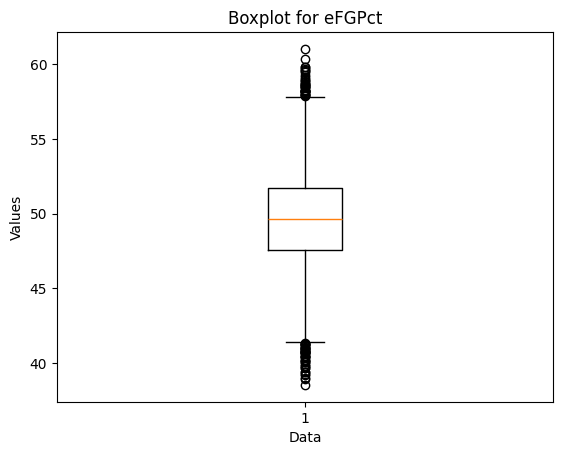

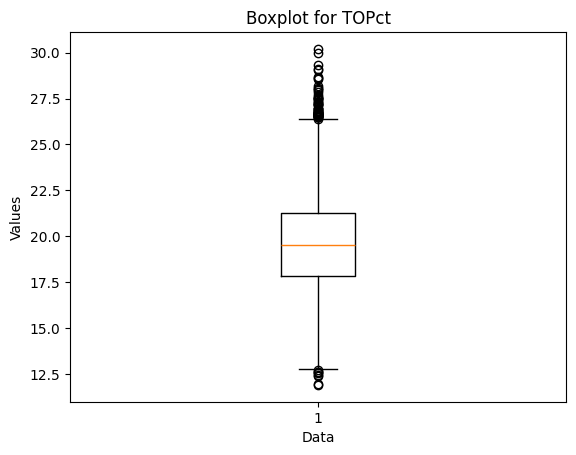

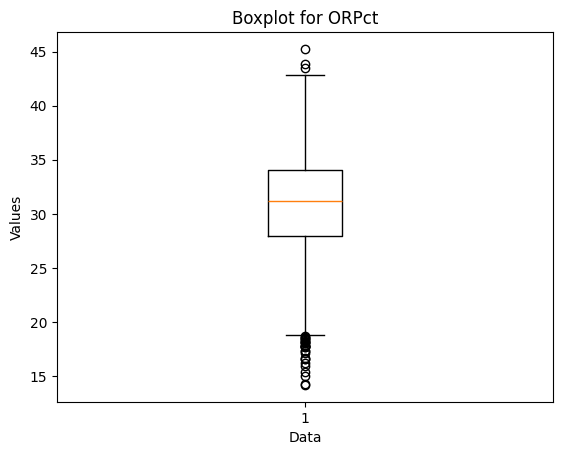

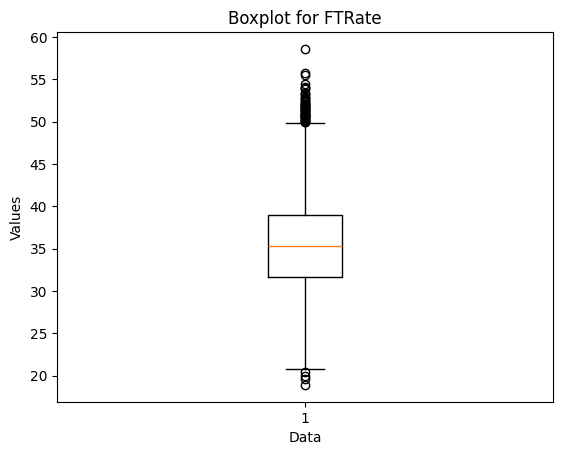

In [6]:
numericalo=offense.select_dtypes(exclude='object')
for col in numericalo:
    fig, ax=plt.subplots()
    ax.boxplot(numericalo[col])
    ax.set_title(f'Boxplot for {col}')
    ax.set_xlabel('Data')
    ax.set_ylabel('Values')
plt.show()

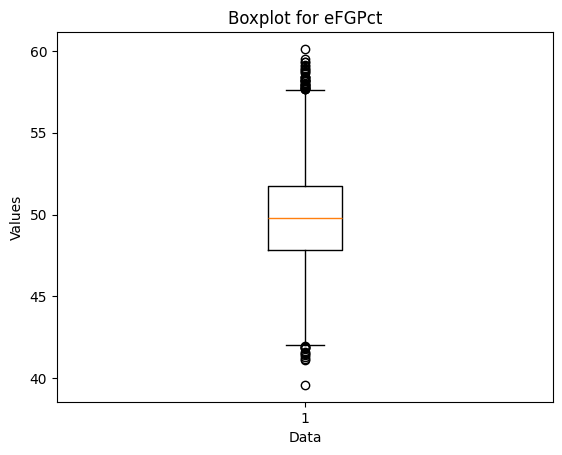

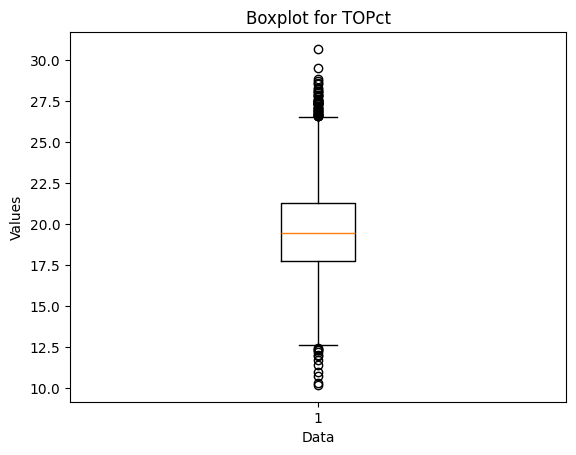

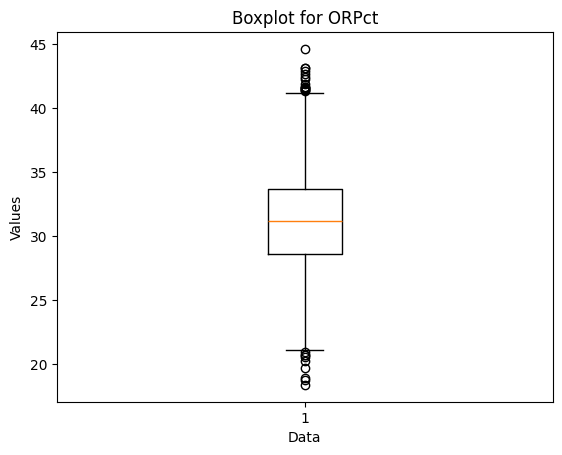

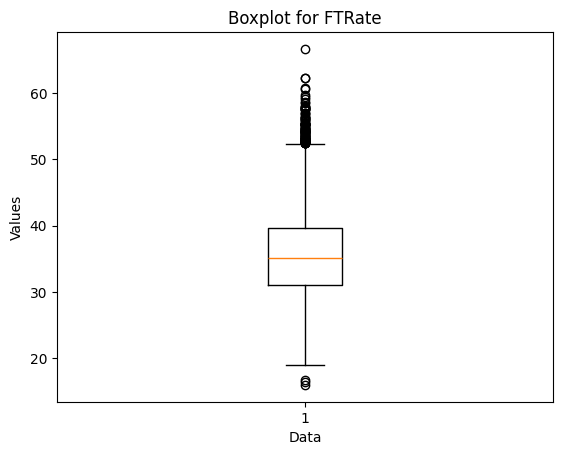

In [7]:
numericald=defense.select_dtypes(exclude='object')
for col in numericald:
    fig, ax=plt.subplots()
    ax.boxplot(numericald[col])
    ax.set_title(f'Boxplot for {col}')
    ax.set_xlabel('Data')
    ax.set_ylabel('Values')
plt.show()

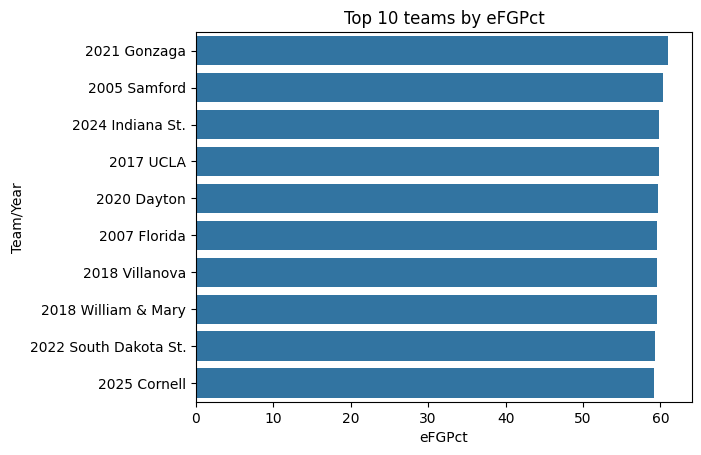

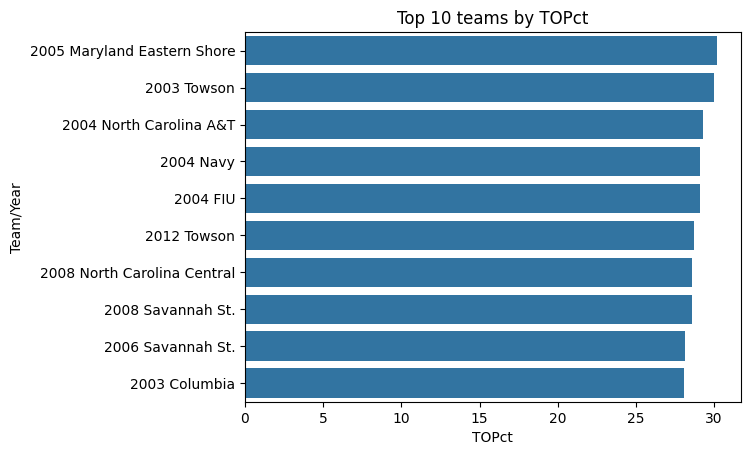

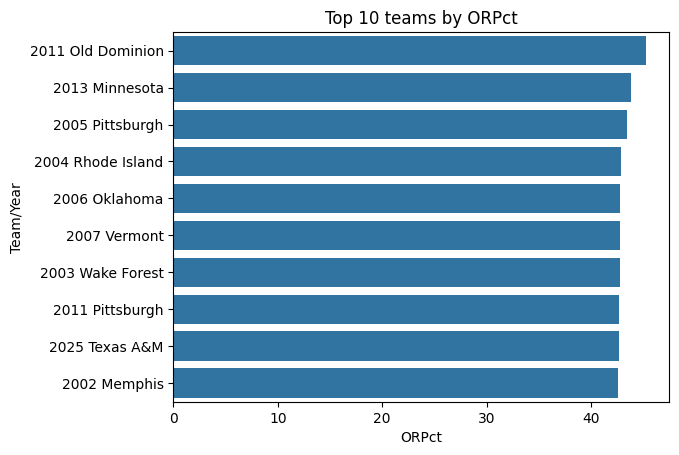

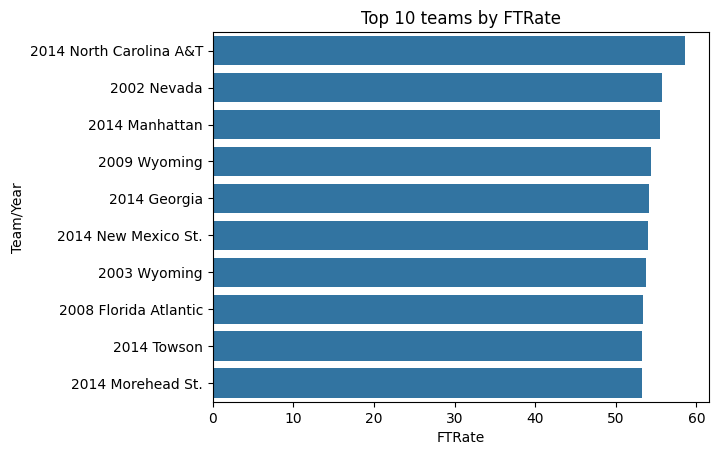

In [8]:
for col in offense.select_dtypes(include='number').columns:
    top_10=offense.nlargest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'])
    plt.title(f'Top 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()

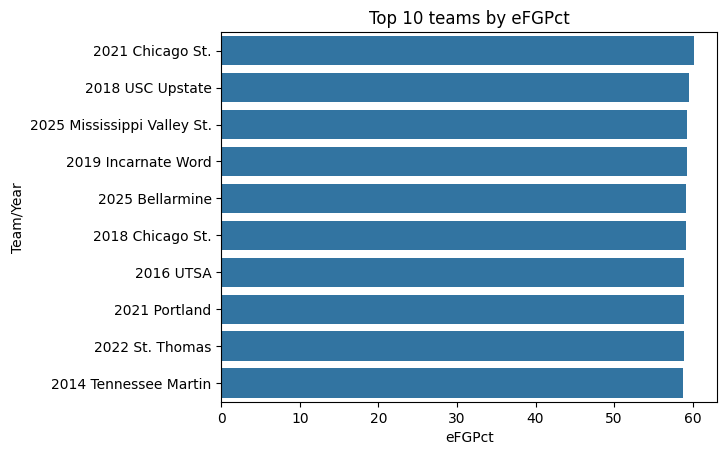

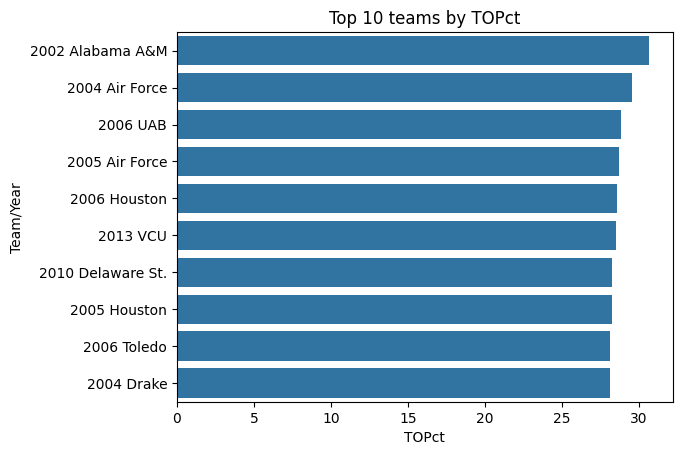

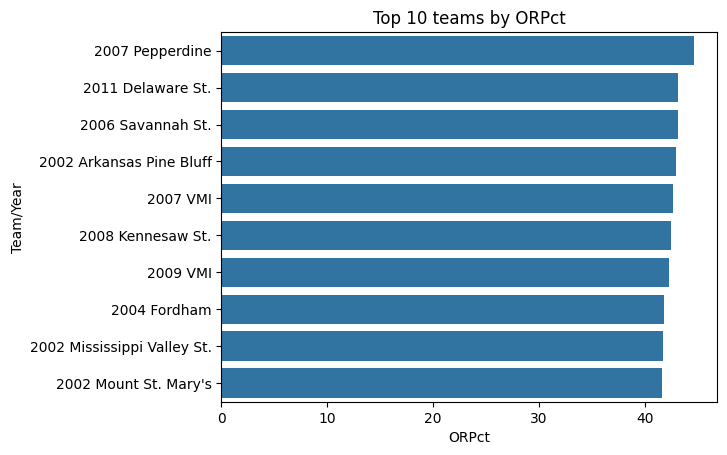

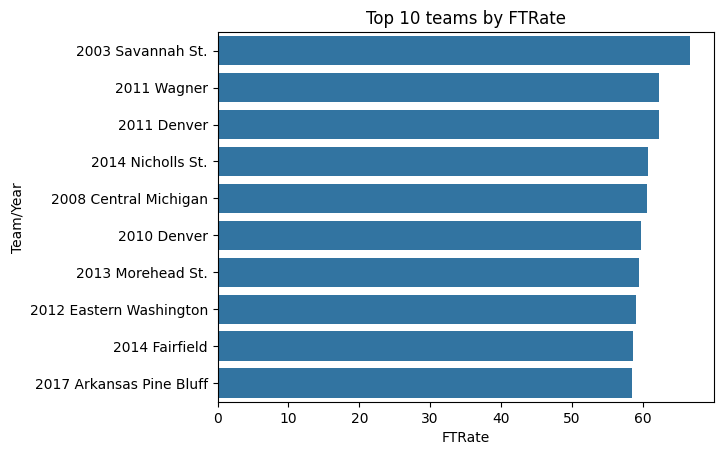

In [9]:
for col in defense.select_dtypes(include='number').columns:
    top_10=defense.nlargest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'])
    plt.title(f'Top 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_4080/718168710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


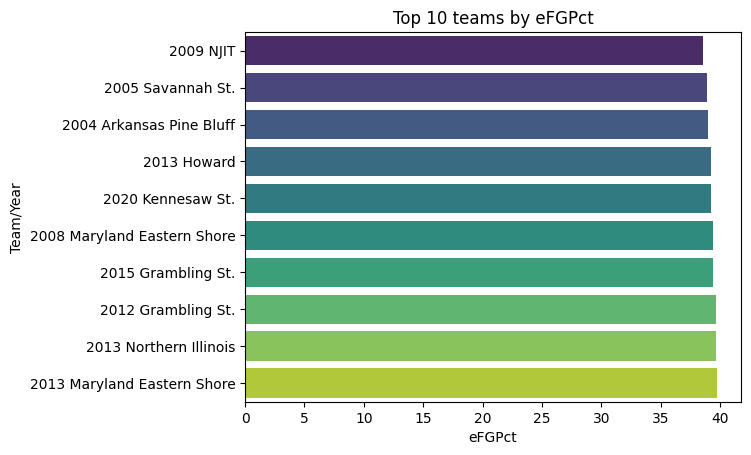

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_4080/718168710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


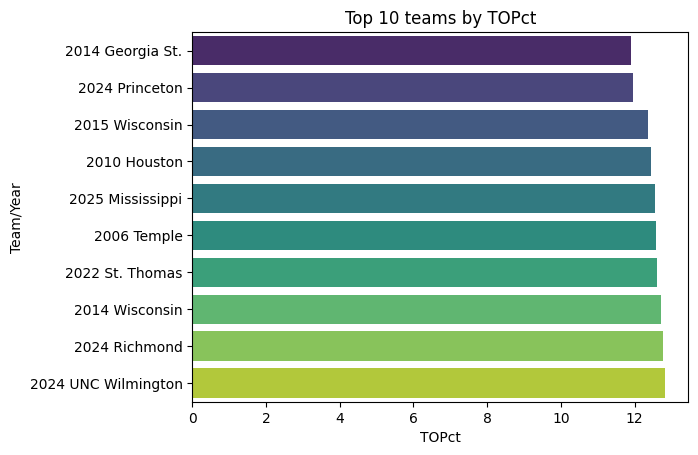

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_4080/718168710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


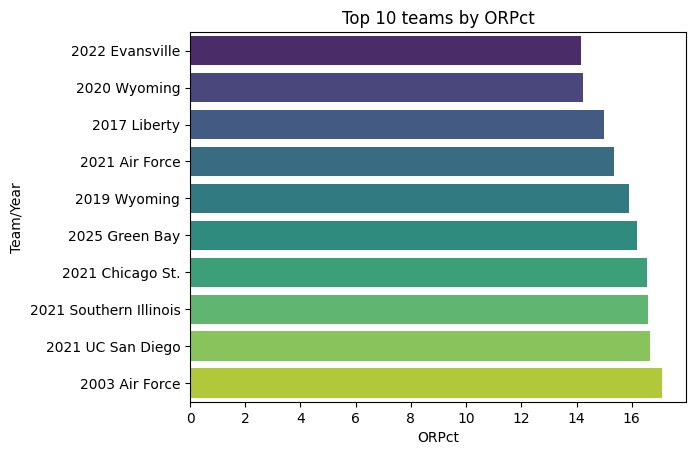

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_4080/718168710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


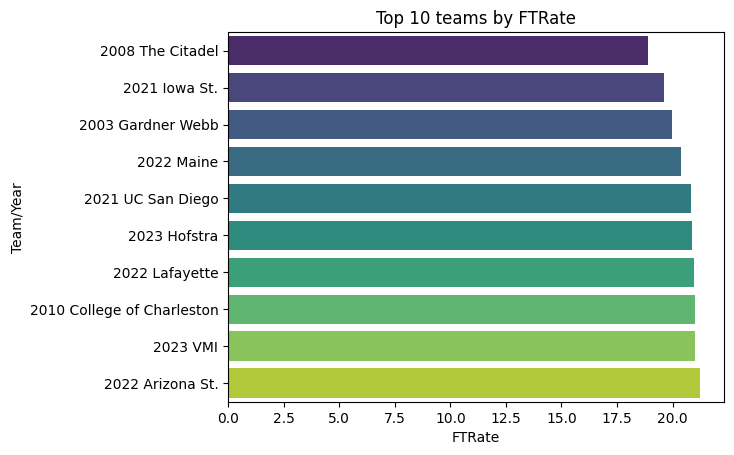

In [10]:
for col in offense.select_dtypes(include='number').columns:
    top_10=offense.nsmallest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')
    plt.title(f'Top 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()

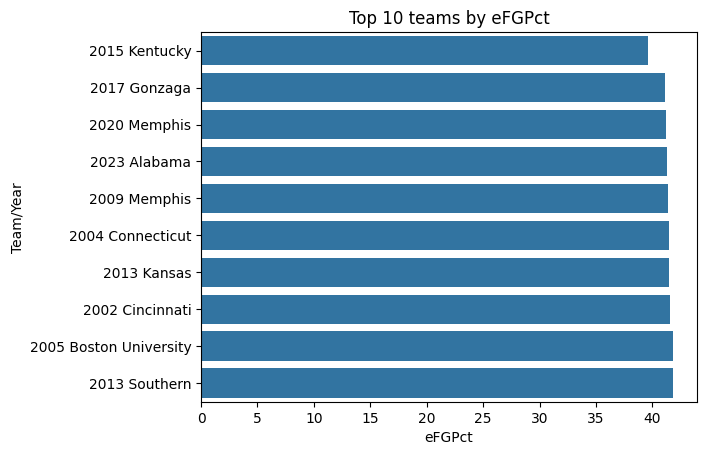

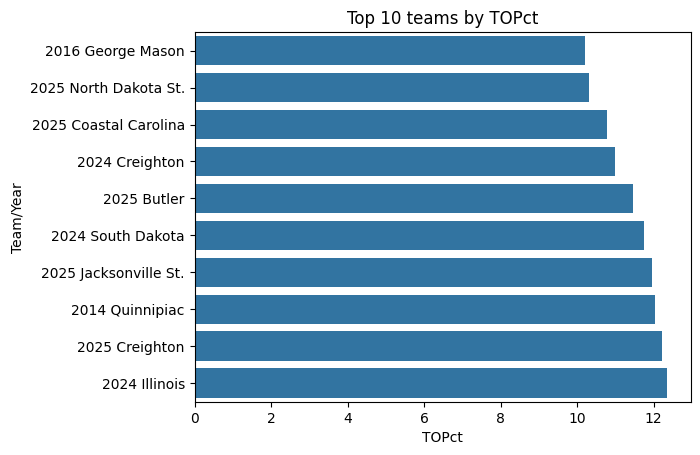

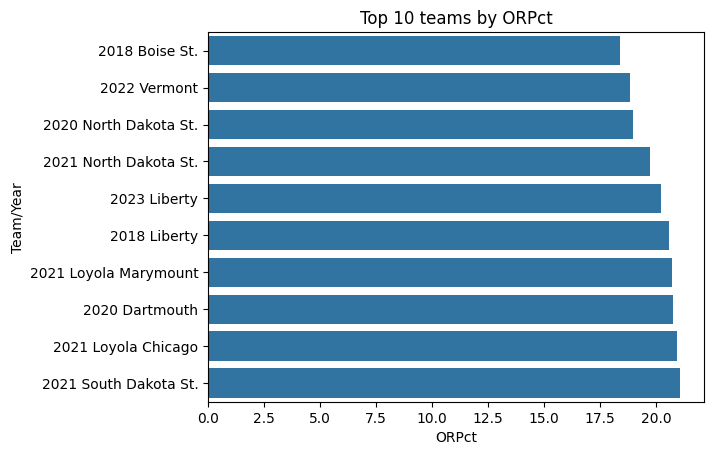

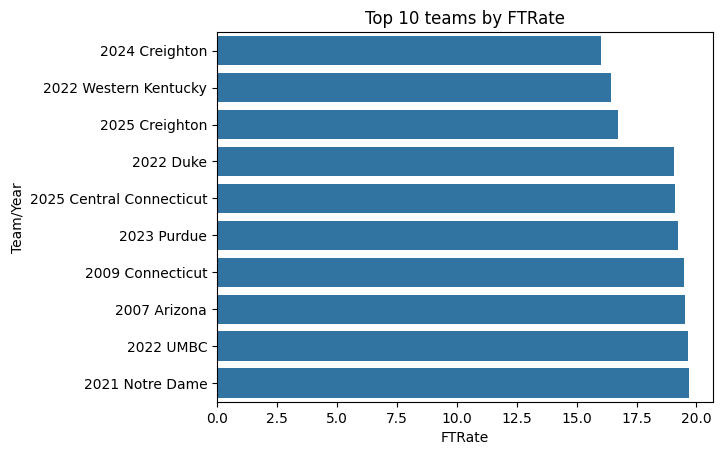

In [11]:
for col in defense.select_dtypes(include='number').columns:
    top_10=defense.nsmallest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'])
    plt.title(f'Top 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()

Calculating Skewness and Kurtosis for each column in the dataset

In [12]:
numericalo.skew(axis=0, skipna=True)

eFGPct   -0.030744
TOPct     0.250551
ORPct    -0.198452
FTRate    0.172885
dtype: float64

In [13]:
numericald.skew(axis=0, skipna=True)

eFGPct    0.058319
TOPct     0.194684
ORPct    -0.009657
FTRate    0.430715
dtype: float64

Wee see that our skewness lies within the acceptable limit(-1 and 1), so we can leave our data alone on that basis.

In [14]:
numericalo.kurtosis(axis=0, skipna=True)

eFGPct    0.110374
TOPct     0.030257
ORPct    -0.116155
FTRate   -0.008258
dtype: float64

In [15]:
numericald.kurtosis(axis=0, skipna=True)

eFGPct   -0.083475
TOPct     0.039008
ORPct    -0.208071
FTRate    0.276928
dtype: float64

The same is true on the Kurtosis front; the acceptable level lies between 2 and -2, and our data lies within the limit. We can move on

Bivariate Analysis: Pearson and Spearman Correlations

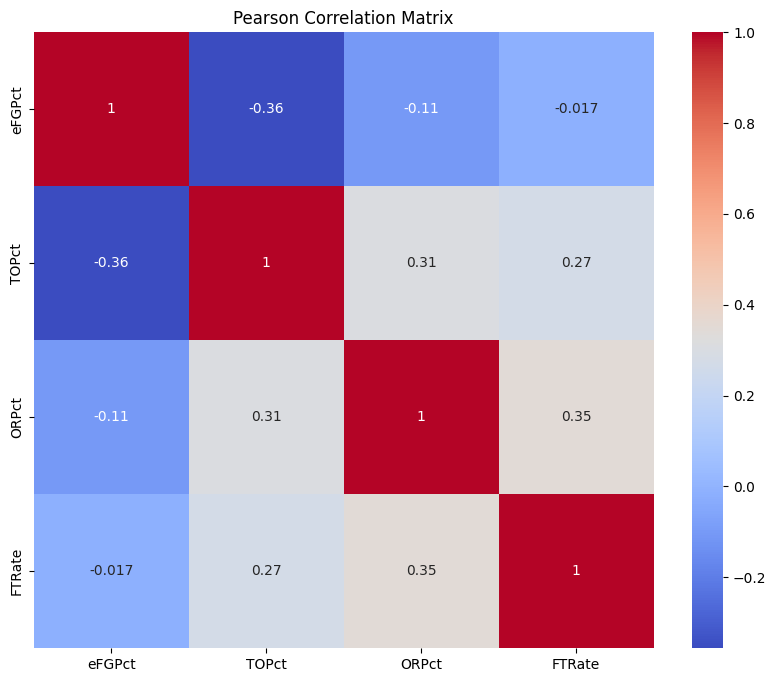

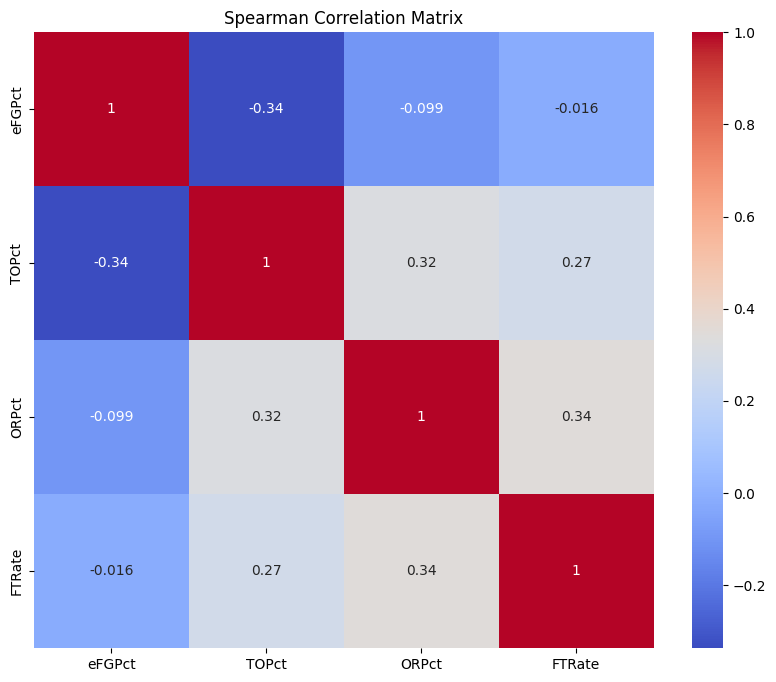

In [16]:
correlators=numericalo
pearson=correlators.corr(method='pearson')
spearman=correlators.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(spearman, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

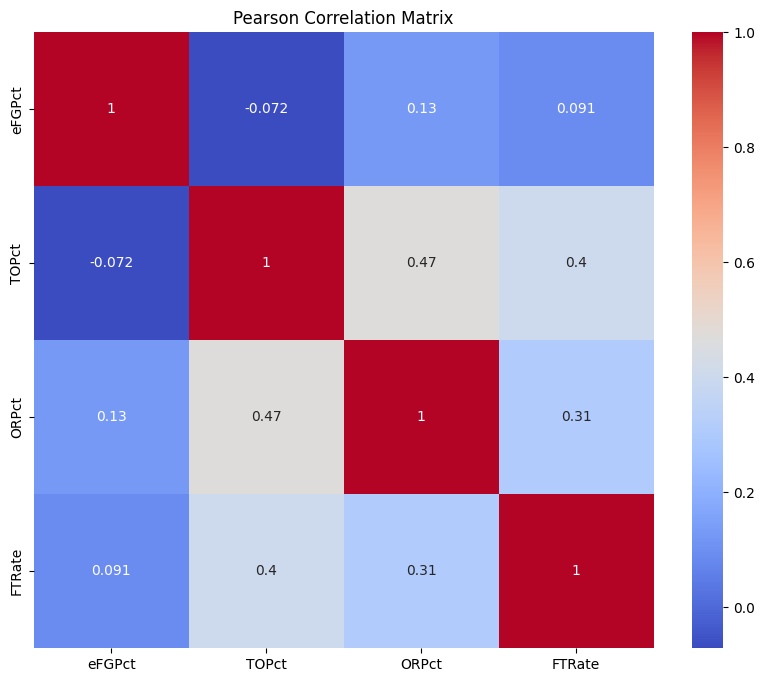

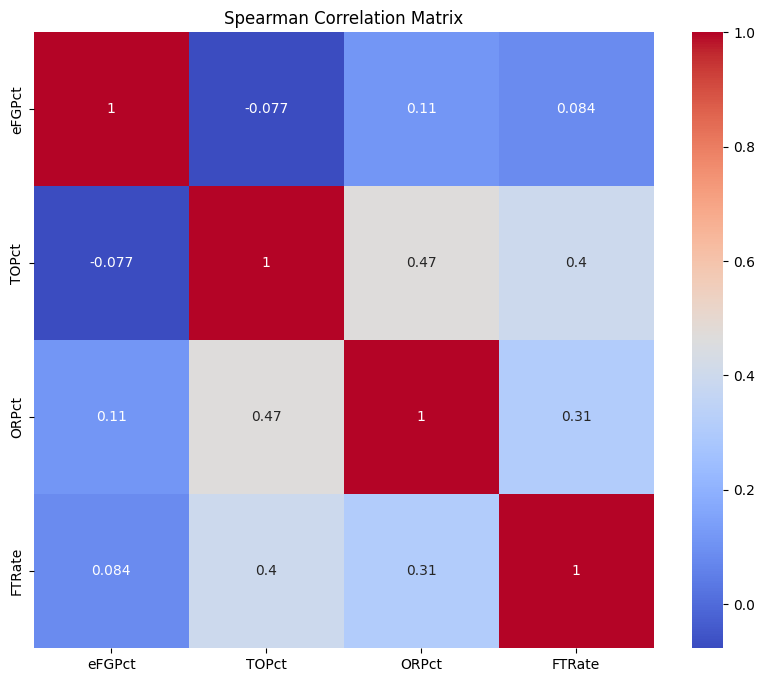

In [17]:
correlators=numericald
pearson=correlators.corr(method='pearson')
spearman=correlators.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(spearman, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

Both our offensive and defensive datasets do not appear to be exceptionally correlated, but let's run our Variance Inflation Factor to confirm.

  features        VIF
0   eFGPct  57.866235
1    TOPct  56.180576
2    ORPct  57.412606
3   FTRate  51.725588


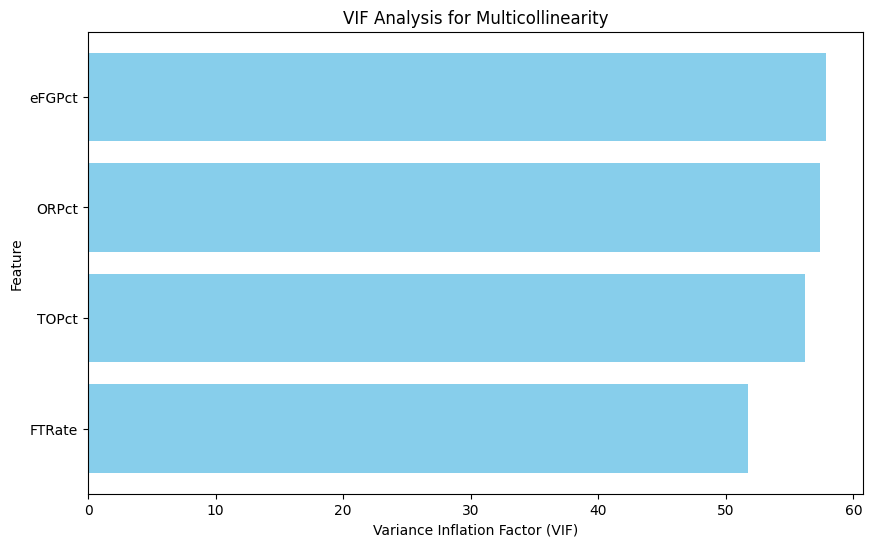

In [18]:
vif_data=pd.DataFrame()
vif_data['features']=numericalo.columns
vif_data['VIF']=[variance_inflation_factor(numericalo.values,i) for i in range(len(numericalo.columns))]
print(vif_data)

vif_data = vif_data.sort_values(by="VIF", ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(vif_data["features"], vif_data["VIF"], color="skyblue")
plt.xlabel("Variance Inflation Factor (VIF)")
plt.ylabel("Feature")
plt.title("VIF Analysis for Multicollinearity")
plt.gca().invert_yaxis()  
plt.show()

The multicollinearity of the features are high; before we apply the data to any kind of ML algorithms, we will have to reduce dimensionality.

  features        VIF
0   eFGPct  77.837172
1    TOPct  76.363894
2    ORPct  98.891447
3   FTRate  39.609191


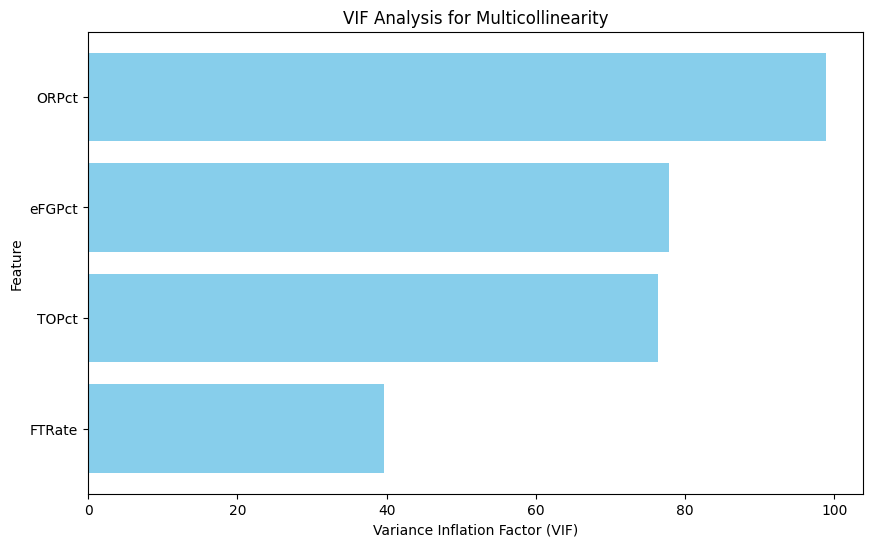

In [19]:
vif_data=pd.DataFrame()
vif_data['features']=numericald.columns
vif_data['VIF']=[variance_inflation_factor(numericald.values,i) for i in range(len(numericald.columns))]
print(vif_data)

vif_data = vif_data.sort_values(by="VIF", ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(vif_data["features"], vif_data["VIF"], color="skyblue")
plt.xlabel("Variance Inflation Factor (VIF)")
plt.ylabel("Feature")
plt.title("VIF Analysis for Multicollinearity")
plt.gca().invert_yaxis()  
plt.show()

Same issue applies to the defensive side.

Scatterplots for TOpct vs ORPct for offense and defense

In [20]:
fig = px.scatter(
offense,
x='TOPct',
y='ORPct',
hover_name='Team/Year',
title='relationship between turnovers and offensive rebounding'
)
fig.show()

In [21]:
fig = px.scatter(
defense,
x='TOPct',
y='ORPct',
hover_name='Team/Year',
title='relationship between forced turnovers and defensive rebounding'
)
fig.show()

Multivariate Analyssis

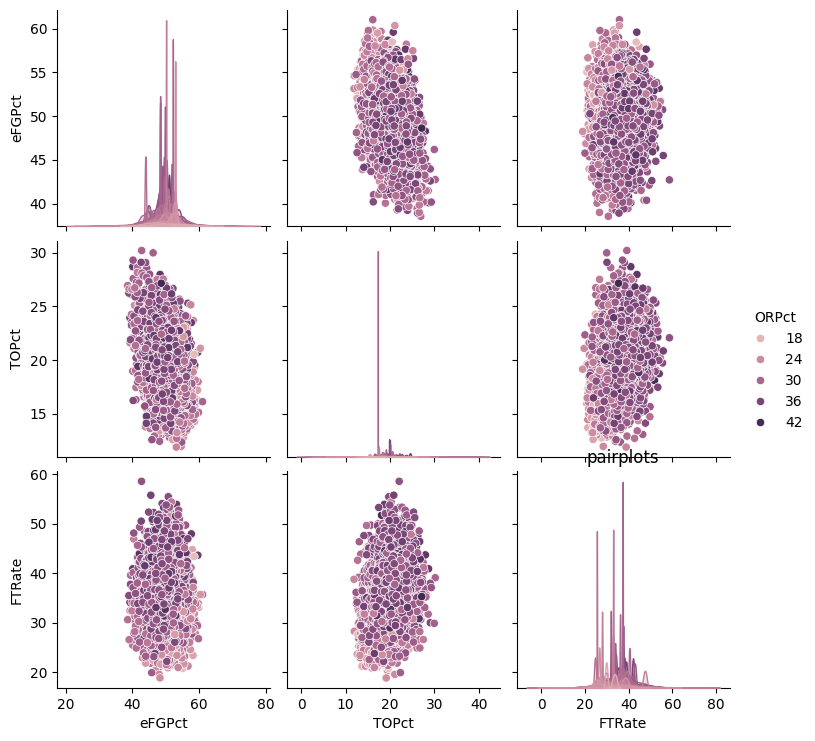

In [22]:
sns.pairplot(offense, hue='ORPct')
plt.title('pairplots')
plt.show()

Preparation for A/B Testing: Our hypothesis is that offensive rebounding increased after the NCAA's three-point line was moved in 2019.
In order to determine a null hypothesis, we need to determine our initial averages.

In [28]:
offense['Year']=offense['Team/Year'].str[:4]

In [29]:
offense.head()

,Team/Year,eFGPct,TOPct,ORPct,FTRate,Year
0,2025 Abilene Christian,47.456214,20.614869,28.205128,39.616347,2025
1,2025 Air Force,50.279107,20.779381,24.039653,37.240829,2025
2,2025 Akron,55.272346,17.293210,32.758621,24.441341,2025
3,2025 Alabama,56.504599,17.668644,37.049550,41.721419,2025
4,2025 Alabama A&M,44.880677,21.762263,35.225956,37.875289,2025


In [32]:
orebavg=offense.groupby('Year')['ORPct'].mean()

In [39]:
bins=[2002,2020, 2026]
labels=['pre-change', 'post-change']
offense['Year']=offense['Year'].astype(int)
offense['binnedOREB']=pd.cut(offense['Year'], bins=bins, labels=labels, right=False)


binner=offense.groupby('binnedOREB')['ORPct'].mean()

print(binner)

offense.to_csv('AB.csv')

binnedOREB
pre-change     31.793206
post-change    28.448573
Name: ORPct, dtype: float64


/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_4080/4175320999.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [50]:
over30=offense[offense['ORPct'] > 30].groupby('Year').size()
print(over30)

Year
2002    278
2003    277
2004    287
2005    282
2006    292
2007    274
2008    273
2009    264
2010    267
2011    257
2012    247
2013    231
2014    225
2015    203
2016    159
2017    143
2018    130
2019    110
2020    111
2021    104
2022    109
2023    131
2024    131
2025    182
dtype: int64


In [40]:
offense.to_csv('AB.csv')